In [1]:
%pylab inline
from scipy.integrate import quad

Populating the interactive namespace from numpy and matplotlib


In [2]:
def u(x):
    return 1/(1+50*(0.5-x)**2)

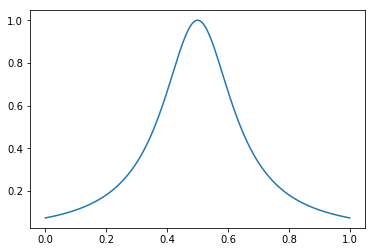

In [3]:
x = linspace(0,1,1025)

_ = plot(x, u(x))

In [4]:
# define the basis functions
n = 10

def V(x, i):
    return x**i

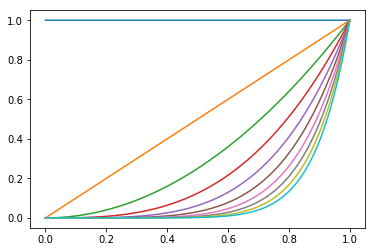

In [5]:
_ = [plot(x, V(x,i)) for i in range(n)]

In [6]:
M = array([[quad(lambda x: V(x,i)*V(x,j), 0, 1)[0] for i in range(n)] for j in range(n)])

In [7]:
U = array([quad(lambda x: V(x,i)*u(x), 0, 1)[0] for i in range(n)])

In [8]:
P = linalg.solve(M,U)

In [9]:
P

array([  1.47592165e-01,  -6.59027127e+00,   1.50640692e+02,
        -1.31376919e+03,   5.64132436e+03,  -1.27582257e+04,
         1.55479267e+04,  -9.68215264e+03,   2.42106884e+03,
        -2.22882280e-01])

In [10]:
Vx = array([V(x,i) for i in range(n)]).T

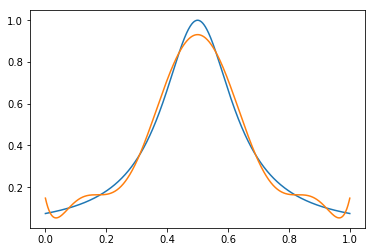

In [11]:
plot(x, u(x))
plot(x, Vx.dot(P))

In [12]:
def legendre(x,i):
    if i == 0:
        return x*0+1
    if i == 1:
        return x
    else:
        n = i-1
        return ((2*n+1)*x*legendre(x,n)-n*legendre(x,n-1))/(n+1)

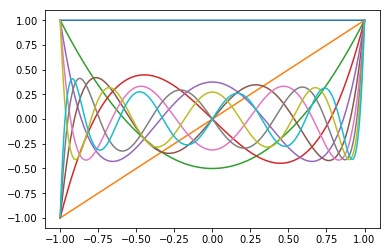

In [13]:
x = linspace(-1,1,1025)
_= [plot(x,legendre(x, i)) for i in range(10)]

In [14]:
n = 10
M = array([[quad(lambda x: legendre(x,i)*legendre(x,j), -1, 1)[0] for i in range(n)] for j in range(n)])

In [15]:
def u(x):
    return 1/(1+50*(.5*x)**2)

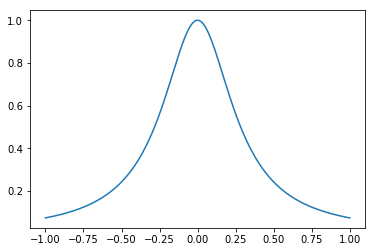

In [16]:
plot(x,u(x))

In [17]:
U = array([quad(lambda x: legendre(x,i)*u(x), -1, 1)[0] for i in range(n)])

In [18]:
P = linalg.solve(M,U)

In [19]:
Vl = array([legendre(x,i) for i in range(n)]).T

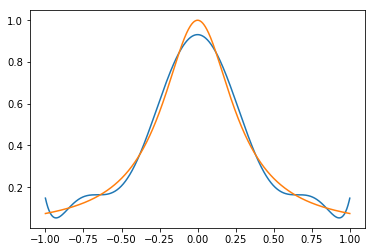

In [20]:
Px = Vl.dot(P)

plot(x, Px)
plot(x, u(x))

In [21]:
def legendre_orthonormal(x,i):
    Pinorm = sqrt(quad(lambda y: legendre(y,i)**2, -1,1)[0])
    return legendre(x,i)/Pinorm

In [22]:
M = array([[quad(lambda x: legendre_orthonormal(x,i)*legendre_orthonormal(x,j), -1, 1)[0] for i in range(n)] for j in range(n)])

In [23]:
Vlon = array([legendre_orthonormal(x,i) for i in range(n)]).T

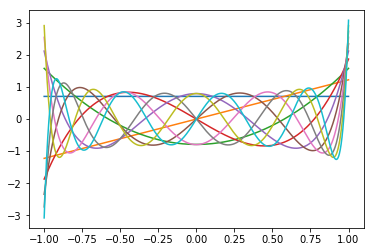

In [24]:
plot(x, Vlon)

In [25]:
U = array([quad(lambda x: legendre_orthonormal(x,i)*u(x), -1, 1)[0] for i in range(n)])

In [26]:
Pxo = Vlon.dot(U)

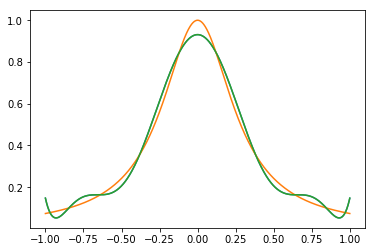

In [27]:
plot(x, Pxo)
plot(x, u(x))
plot(x, Px)

In [28]:
def P(x):
    return sum([legendre_orthonormal(x,i)*U[i] for i in range(n)], axis=0)

In [29]:
error = sqrt(quad(lambda x: (P(x)-u(x))**2, -1, 1)[0])

In [30]:
from numpy.polynomial.legendre import leggauss

In [38]:
q, w = leggauss(5)

In [98]:
def lagrange(i, q, x):
    res = x*0+1
    assert i < len(q)
    for j in range(len(q)):
        if j != i:
              res *= (x - q[j])/(q[i]-q[j])
    return res


In [99]:
V = array([lagrange(i,q,x) for i in range(len(q))]).T

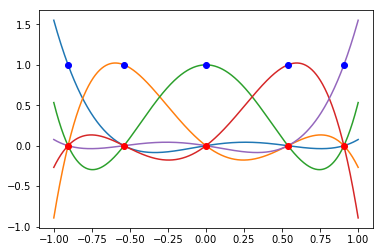

In [101]:
plot(x,V)
plot(q,0*q, 'ro')
plot(q,0*q+1, 'bo')

In [93]:
# Compute the weights using general quad from numpy
W = array([quad(lambda x: lagrange(i, q, x), -1,1)[0] for i in range(len(q))])

In [94]:
# Check the error in the weights
W-w

array([ -3.05311332e-16,   1.66533454e-16,   1.11022302e-16,
         1.66533454e-16,  -3.05311332e-16])

In [95]:
# Check the main theorem: compute the integral of (x+1)**i between -1 and 1
# both exactly (2**(1+1)/(i+1)) and approximately using the quadrature
# formula.

U = array([(q+1)**i for i in range(2*len(q)+4)])

Exact = array([2**(i+1)/(i+1) for i in range(2*len(q)+4)])

In [96]:
# sum of u(q_i) w_i => u.dot(w)
approx_int = U.dot(w)

In [102]:
error = approx_int - Exact
print(error)

[  0.00000000e+00   0.00000000e+00   4.44089210e-16   8.88178420e-16
   1.77635684e-15   3.55271368e-15   7.10542736e-15   1.42108547e-14
   2.13162821e-14   2.84217094e-14  -2.93181246e-03  -3.22499370e-02
  -2.01493196e-01  -9.42414826e-01]
